## Import Libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head() # Kyphosis absense or present after operation, age in months, number of vertebrae, start vertebrae

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Splitting the dataset into Train and Test sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Building the Model - Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

## Training the Model

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluating the Model 

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [20]:
print(classification_report(y_test,predictions))
# The support is the number of occurrences of each class in y_test.

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [21]:
print(accuracy_score(y_test,predictions))

0.84


In [22]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 2  3]]


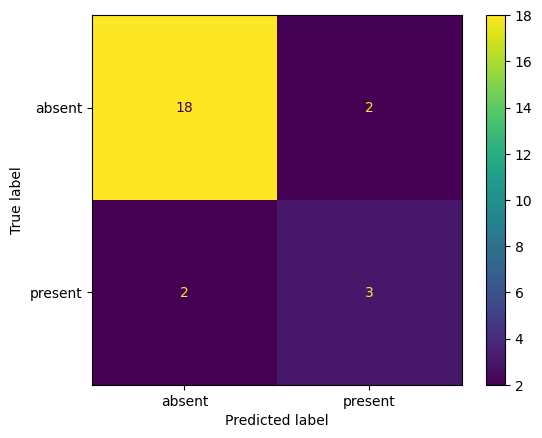

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 3  2]]


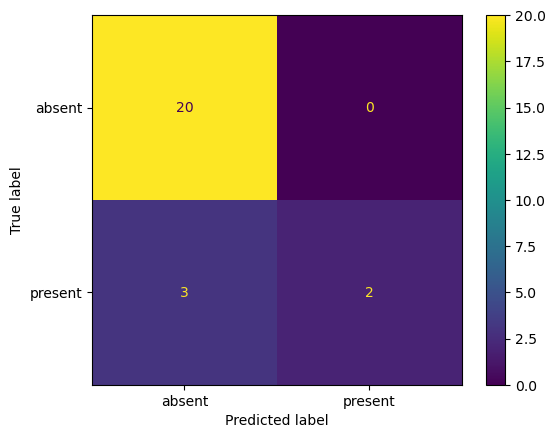

In [27]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        20
     present       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



In [29]:
print(accuracy_score(y_test,predictions))

0.84
